In [14]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from kcm import *  

Probability: 0.5


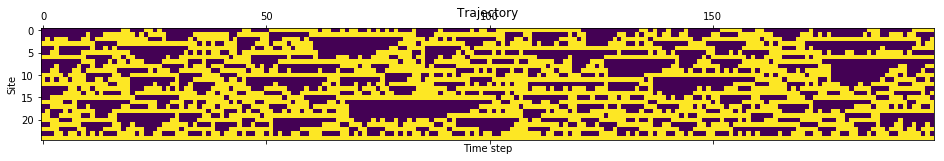

Probability: 0.6


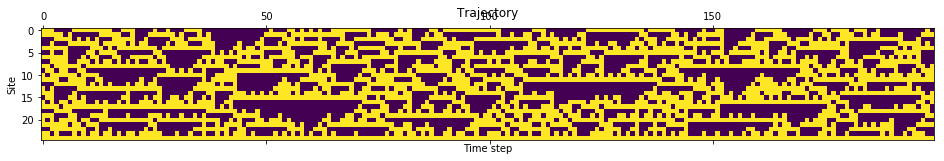

Probability: 0.7


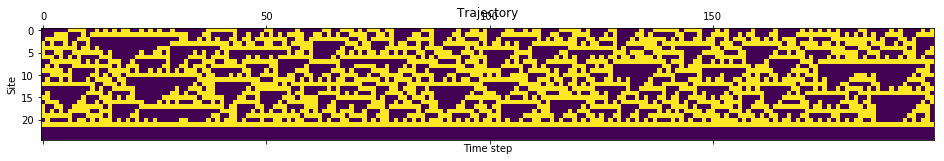

Probability: 0.8


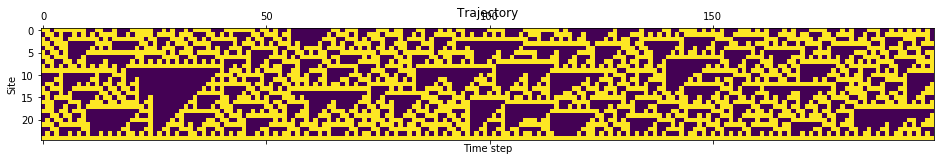

Probability: 0.9


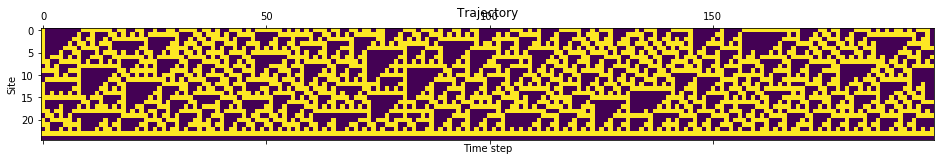

Probability: 1.0


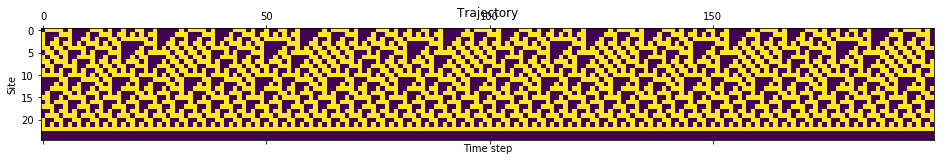

Probability: 1.1


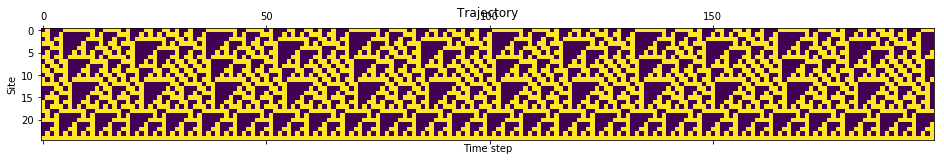

In [17]:
probs = np.arange(0.5, 1.1, 0.1)
 
for prob in probs:
    print("Probability: {}".format(prob))
    east_kcm = EastKCM(prob, 25, 200, 50000)
    trajectory = east_kcm.gen_trajectory()
    draw_trajectory(trajectory)

In [ ]:
fa_kcm = OneSpinFAKCM(0.5, 25, 200, 0.1, 0.1, 1, 50000)
trajectory = fa_kcm.gen_trajectory()
draw_trajectory(trajectory)